In [3]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

data = load.data(dataset="mnist")
predictor = load.predictor(dataset="mnist")
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset="mnist")


crop_0 = crop(model,predictor=predictor,data=data)

Usando mnist como dataset


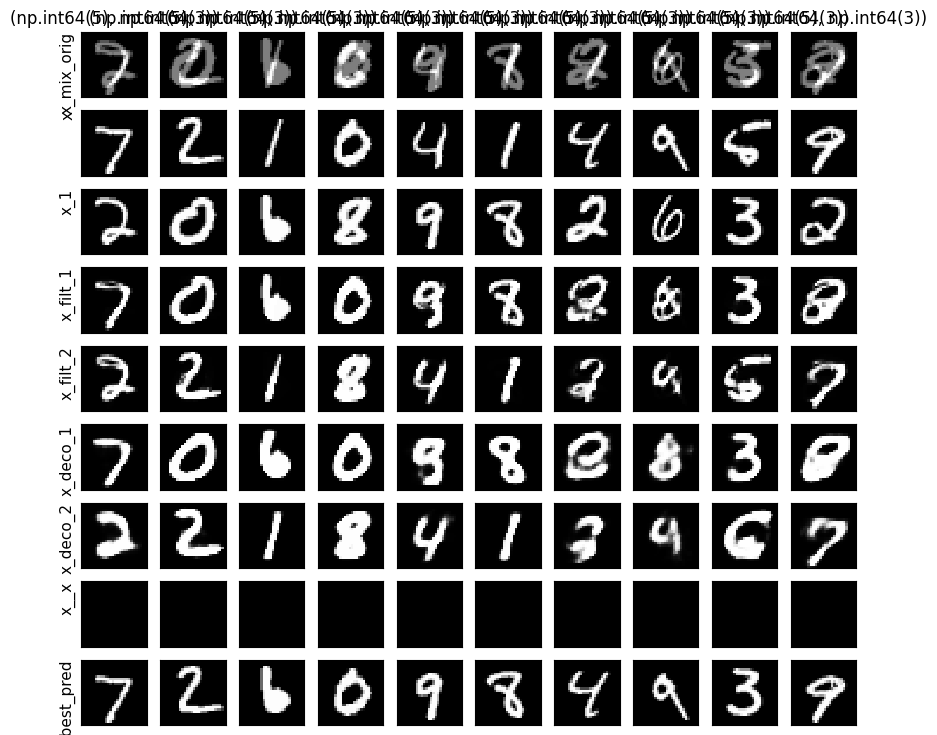

{'bpsnr': (<tf.Tensor: shape=(), dtype=float32, numpy=16.352075576782227>,
  <tf.Tensor: shape=(), dtype=float32, numpy=3.2369260787963867>),
 'bpsnr_d': (<tf.Tensor: shape=(), dtype=float32, numpy=13.119163513183594>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.3667643070220947>),
 'predictions_1': array([[2.15494993e-06, 3.64087782e-07, 1.91913149e-03, 3.39261889e-02,
         6.20098433e-07, 4.15608883e-06, 1.89778679e-10, 9.63144183e-01,
         3.11636395e-04, 6.91519526e-04],
        [9.99994814e-01, 1.11994546e-11, 4.23539723e-06, 6.97370117e-09,
         1.29489637e-12, 1.56918058e-13, 5.86174387e-10, 1.08993023e-11,
         6.98728142e-09, 8.08801474e-07],
        [4.65872638e-08, 2.43526763e-08, 7.13808168e-09, 1.75173631e-09,
         7.65937057e-06, 1.23729496e-05, 9.99958336e-01, 5.42361191e-11,
         2.14029587e-05, 6.20926865e-10],
        [9.99997199e-01, 1.00278921e-12, 1.60775233e-08, 5.70676700e-11,
         3.09951148e-10, 9.84715065e-09, 2.57280249e-06, 5.4

In [ ]:
num_img = 10

crop_0.unmix(
    x_test[0:num_img],
    x_test_1[0:num_img],
    y_test[:num_img],
    y_test_1[:num_img],
    show_graph=True,
)

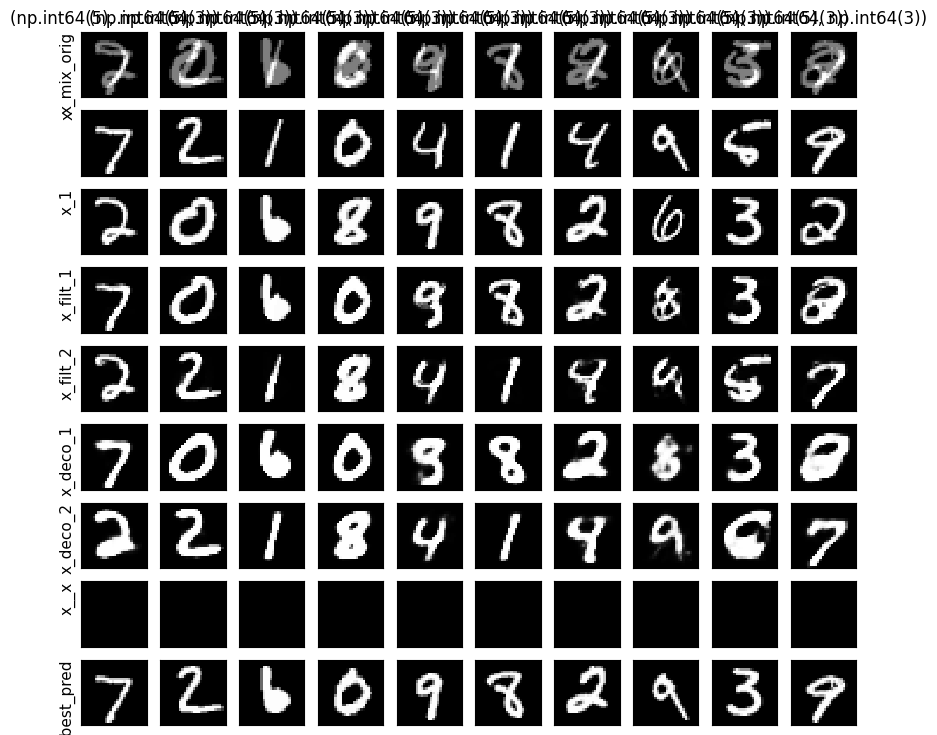

{'bpsnr': (<tf.Tensor: shape=(), dtype=float32, numpy=17.391521453857422>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.8735666275024414>),
 'bpsnr_d': (<tf.Tensor: shape=(), dtype=float32, numpy=13.739278793334961>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.116558790206909>),
 'predictions_1': array([[2.00526795e-08, 1.97289829e-09, 6.26941301e-06, 1.76696500e-04,
         4.16017915e-11, 4.11895513e-08, 3.12309476e-15, 9.99813080e-01,
         9.60835109e-07, 2.80489803e-06],
        [9.99998748e-01, 1.29009553e-10, 6.57521014e-07, 2.29313035e-09,
         7.71724837e-11, 1.53264066e-13, 4.41858194e-09, 3.07232746e-11,
         2.59873945e-09, 4.17519487e-07],
        [4.29972111e-08, 4.39230128e-08, 1.00375566e-08, 2.57925947e-09,
         4.22015582e-05, 2.86870836e-05, 9.99886453e-01, 1.80512036e-10,
         4.24936698e-05, 3.54091556e-09],
        [9.99998391e-01, 2.18034740e-11, 1.39244605e-07, 3.97592570e-10,
         1.09756266e-08, 1.59421987e-07, 1.01479804e-06, 1.22

In [9]:
num_img = 10

crop_1 = crop(model,predictor=predictor,data=data,bias=0.25, slope=10)

crop_1.unmix(
    x_test[0:num_img],
    x_test_1[0:num_img],
    y_test[:num_img],
    y_test_1[:num_img],
    show_graph=True,
)

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


#crop_f0 = crop(model,predictor=predictor,data=data)

2025-08-22 21:09:45.661023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-22 21:09:45.698398: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-22 21:09:45.713243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755907785.742407 2328944 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755907785.748693 2328944 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755907785.769690 2328944 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando fashion como dataset


2025-08-22 21:09:49.501041: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-08-22 21:09:49.501085: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-22 21:09:49.501093: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: pc-santi
2025-08-22 21:09:49.501099: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: pc-santi
2025-08-22 21:09:49.501229: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.64.3
2025-08-22 21:09:49.501256: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 575.64.3
2025-

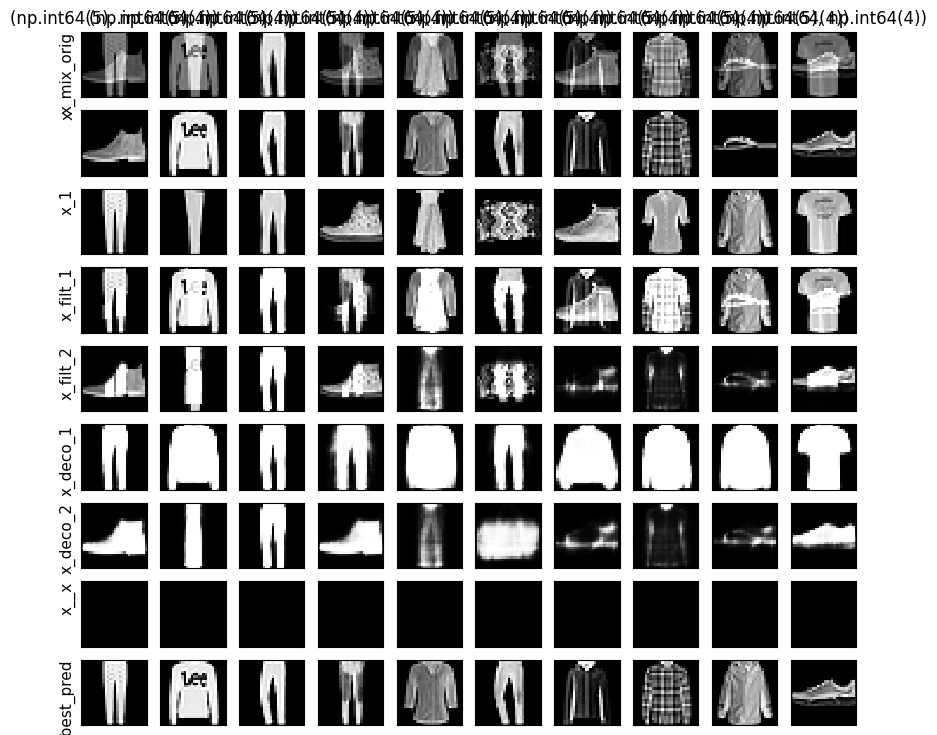

{'bpsnr': (<tf.Tensor: shape=(), dtype=float32, numpy=15.00500774383545>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.354048013687134>),
 'bpsnr_d': (<tf.Tensor: shape=(), dtype=float32, numpy=11.007736206054688>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.175135850906372>),
 'predictions_1': array([[1.22513154e-06, 9.99965250e-01, 1.42877326e-07, 3.00996271e-05,
         3.16084447e-06, 2.58260471e-08, 5.80702704e-08, 5.81393138e-08,
         5.67526193e-10, 3.19927160e-08],
        [1.23818434e-04, 2.58449036e-05, 9.93201852e-01, 2.36325562e-07,
         3.18628503e-04, 3.73605729e-07, 6.32917415e-03, 2.04277328e-09,
         3.67089363e-08, 4.21483559e-09],
        [2.04711159e-06, 9.99996483e-01, 1.76681016e-08, 1.12500709e-06,
         2.82590179e-07, 6.25125507e-09, 1.16975425e-08, 1.54318197e-10,
         3.14663362e-09, 1.38627538e-11],
        [8.28630891e-06, 9.99563158e-01, 1.59242393e-06, 1.57603663e-05,
         4.06702951e-04, 4.24754063e-08, 3.91713797e-07, 1.7072

In [11]:
num_img = 10

crop_f0.unmix(
    x_test[0:num_img],
    x_test_1[0:num_img],
    y_test[:num_img],
    y_test_1[:num_img],
    show_graph=True,
)

Usando fashion como dataset


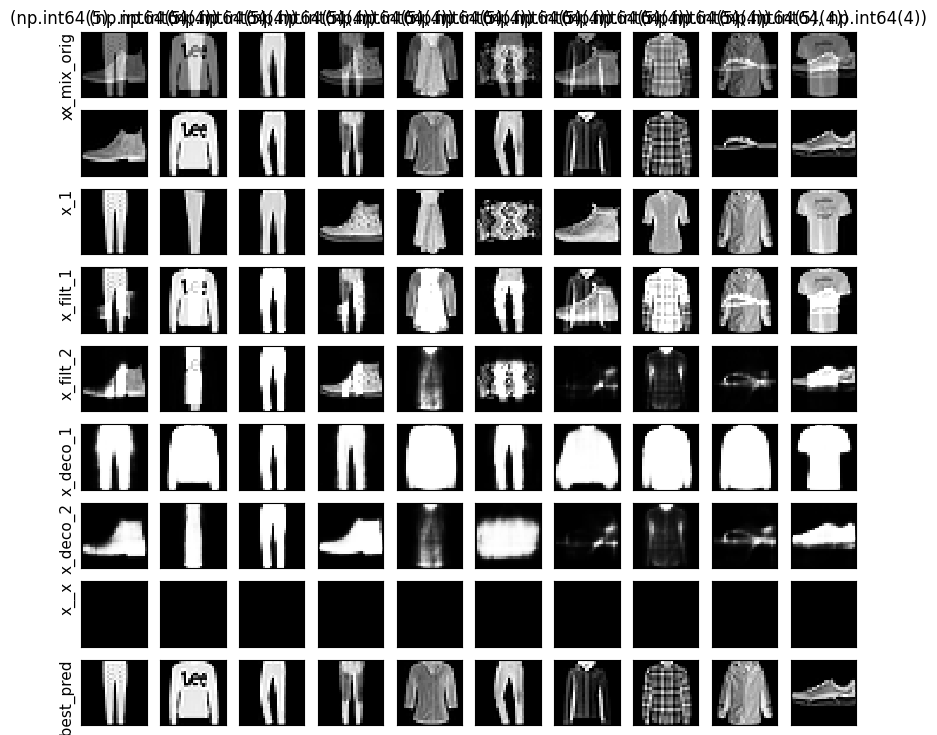

{'bpsnr': (<tf.Tensor: shape=(), dtype=float32, numpy=14.91382122039795>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.3524205684661865>),
 'bpsnr_d': (<tf.Tensor: shape=(), dtype=float32, numpy=10.842020034790039>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.070862293243408>),
 'predictions_1': array([[4.28615863e-07, 9.99900520e-01, 5.99373209e-07, 6.69850997e-05,
         2.46332766e-05, 1.15542278e-07, 5.83731378e-07, 2.55005716e-06,
         2.41196685e-09, 3.62814490e-06],
        [1.25470644e-04, 3.01432665e-05, 9.90786076e-01, 2.30025108e-07,
         3.54548567e-04, 4.91320122e-07, 8.70304555e-03, 1.59712532e-09,
         2.89657063e-08, 5.52291102e-09],
        [2.38392181e-06, 9.99995649e-01, 2.12300311e-08, 1.51929953e-06,
         3.46437247e-07, 7.37403827e-09, 2.14666436e-08, 1.41187881e-10,
         5.42348877e-09, 2.25701385e-11],
        [6.92069398e-06, 9.99778986e-01, 9.10040740e-07, 3.52745228e-05,
         1.77683381e-04, 3.34536807e-08, 1.71369351e-07, 3.838

In [8]:

import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)



crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.2562,slope=10.0067,beta=2)

num_img = 10

crop_f0.unmix(
    x_test[0:num_img],
    x_test_1[0:num_img],
    y_test[:num_img],
    y_test_1[:num_img],
    show_graph=True,
)

Variaciones de Beta

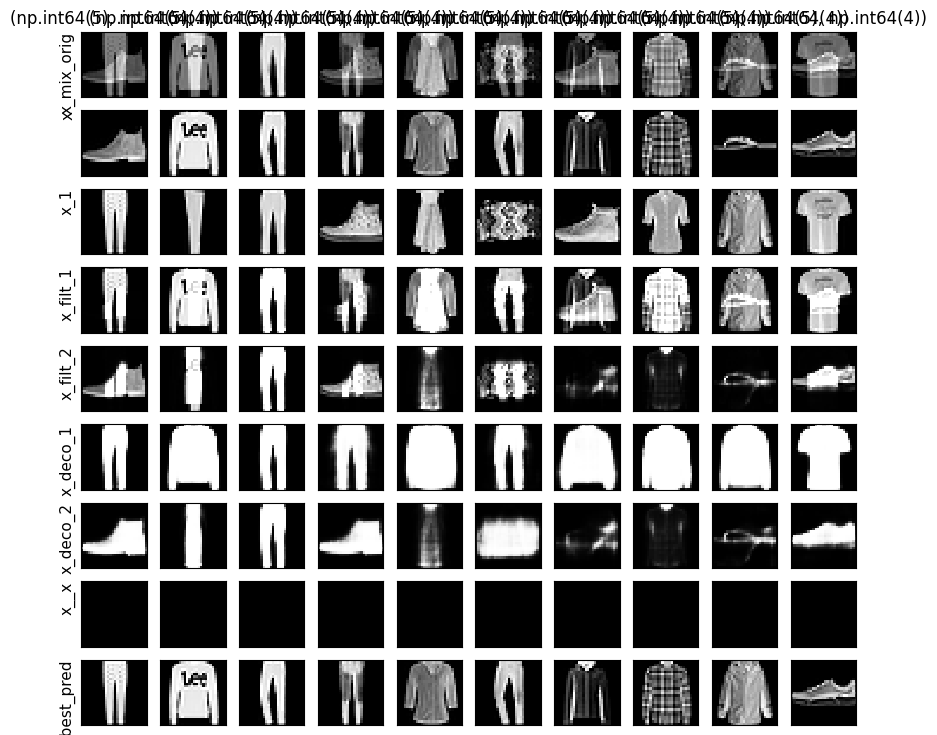

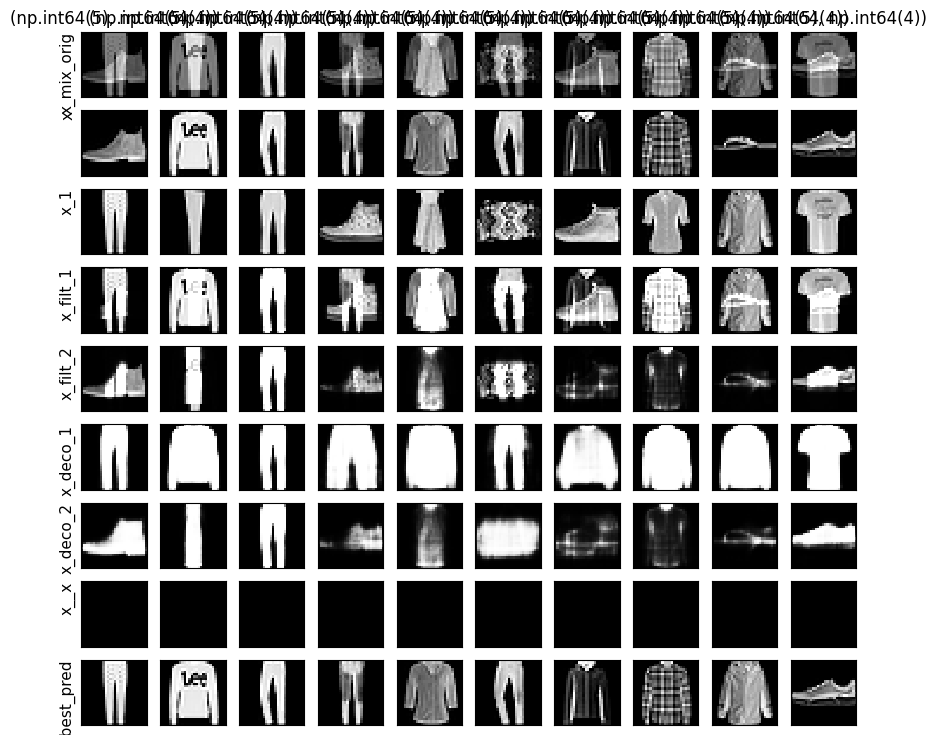

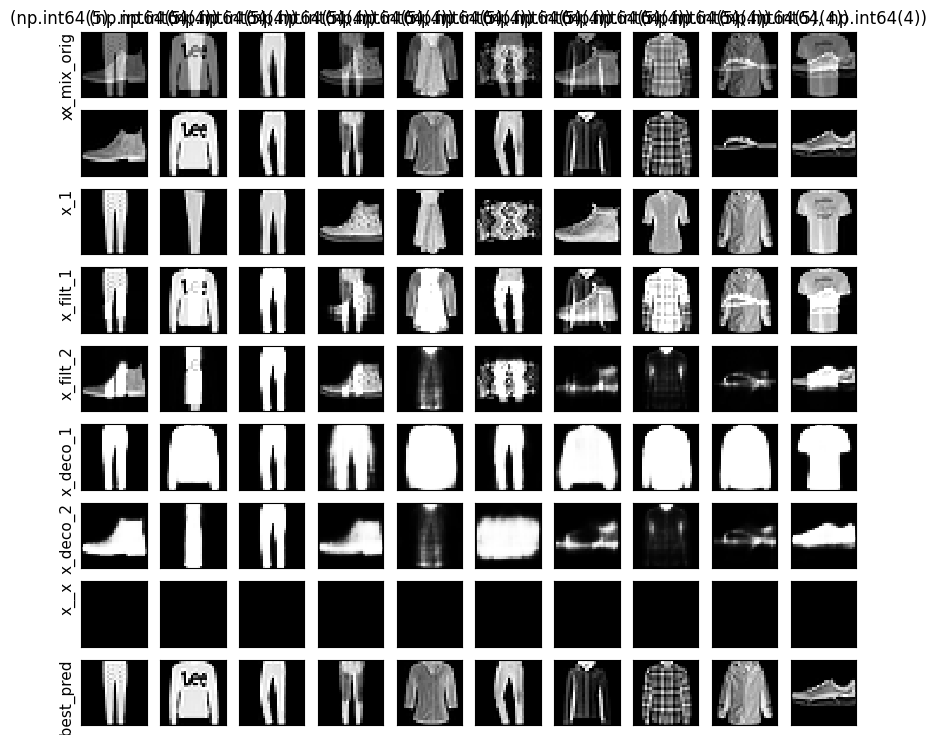

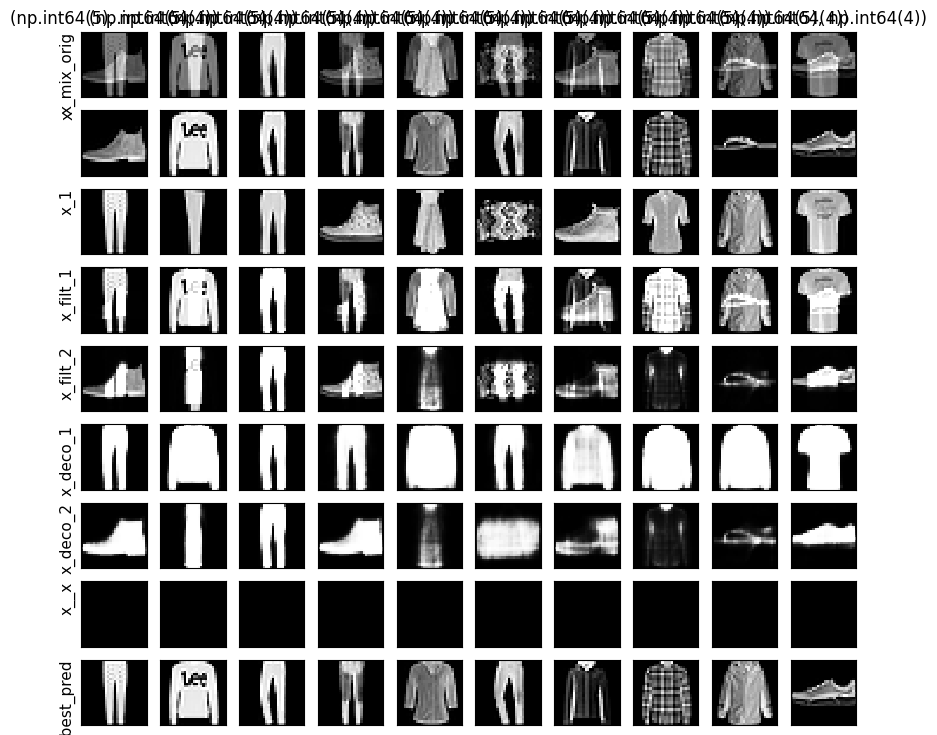

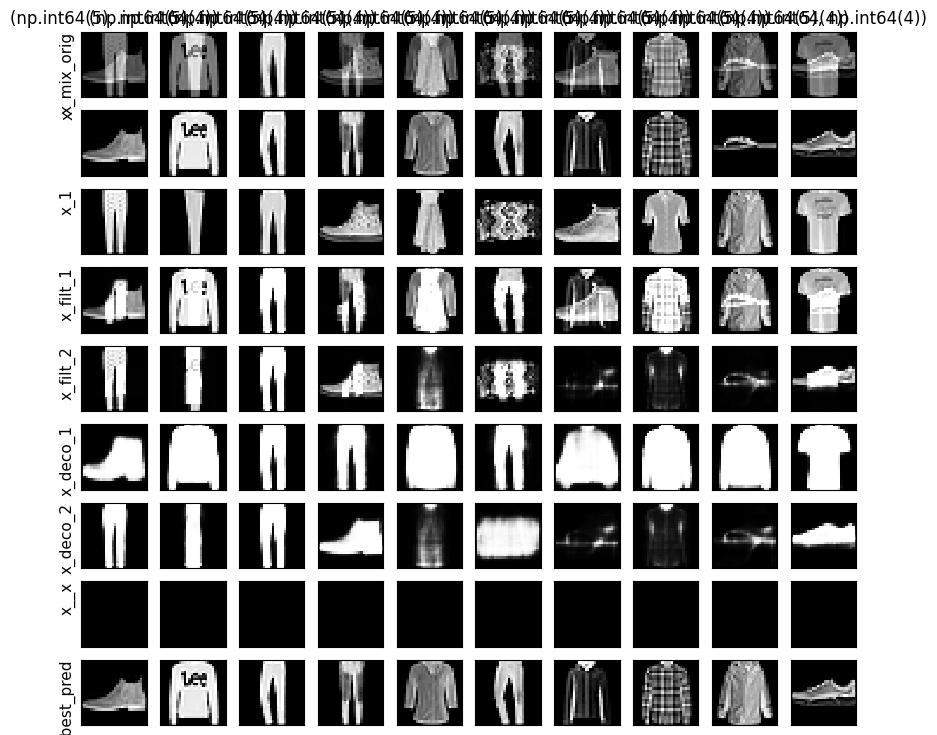

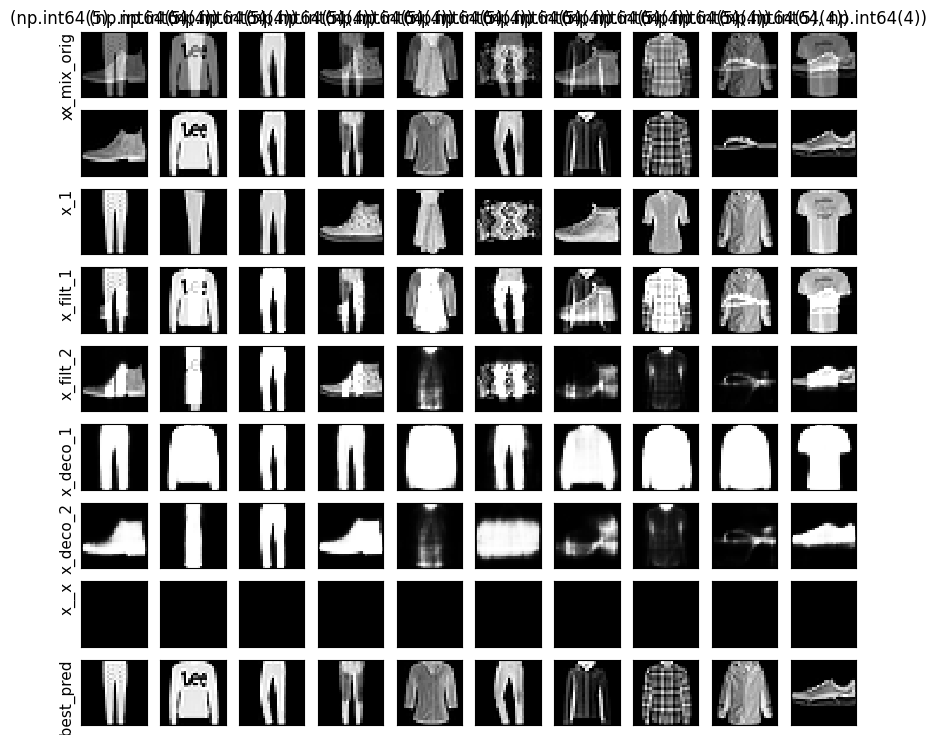

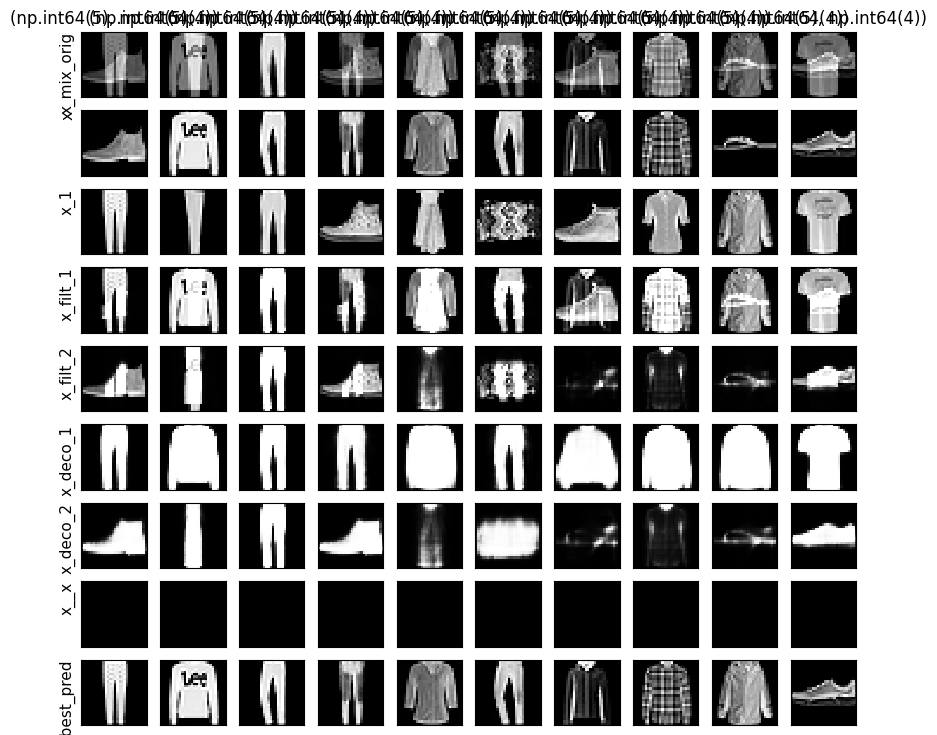

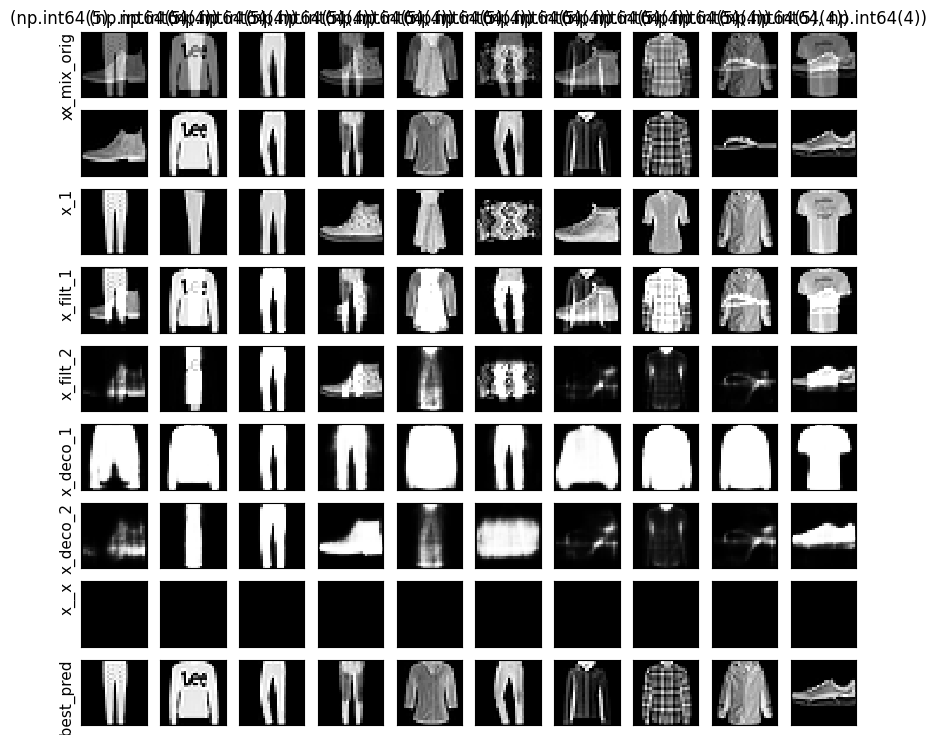

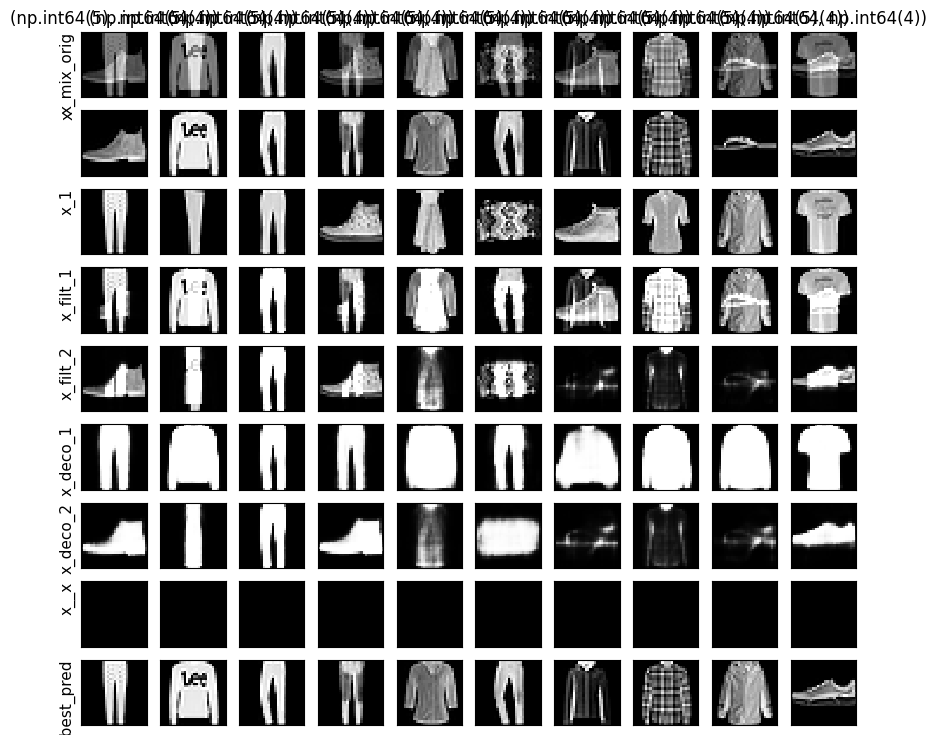

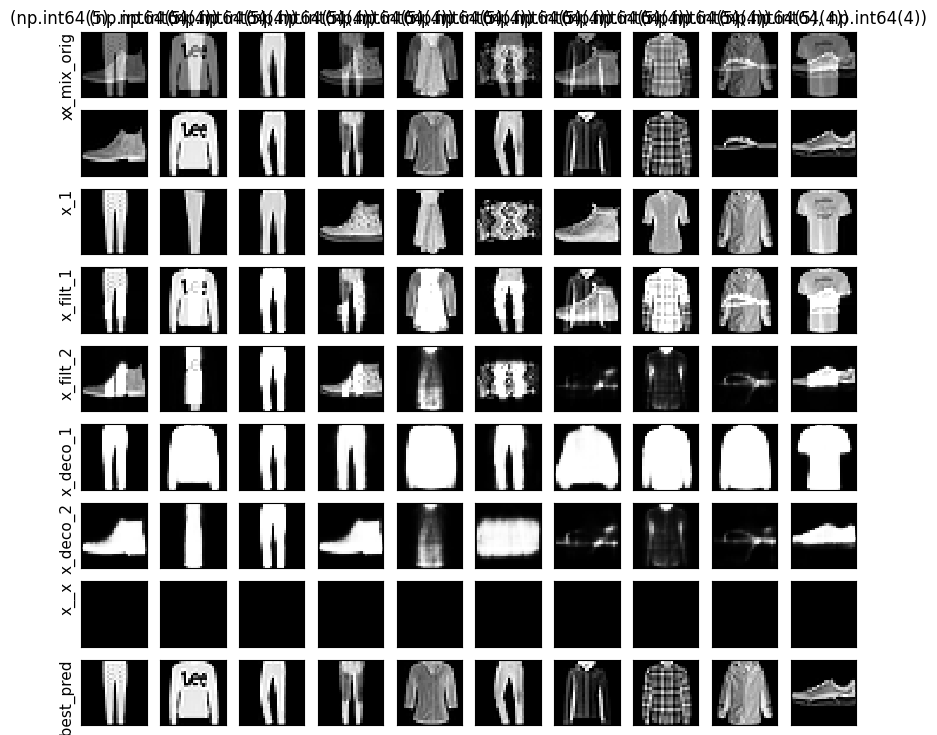

In [9]:
for i in range(10):
    crop_f0 = crop(model,predictor=predictor,
                data=data,bias=0.2562,slope=10.0067,beta=i)

    num_img = 10

    crop_f0.unmix(
        x_test[0:num_img],
        x_test_1[0:num_img],
        y_test[:num_img],
        y_test_1[:num_img],
        show_graph=True,
)

Solo cambiando beta no parece haber cambios

# --- Normalización con softmax ---
Normalizacion de ambias mascaras
masks = tf.concat([x_decoded_1, x_decoded_2], axis=-1)  # (batch, h, w, 2)
masks = tf.nn.softmax(masks, axis=-1)  # normaliza canal a canal

m1 = masks[..., 0:1]  # máscara 1
m2 = masks[..., 1:2]  # máscara 2

x_mix_filtrado_1 = tf.clip_by_value(x_mix_orig * m1, 0, 1)
x_mix_filtrado_2 = tf.clip_by_value(x_mix_orig * m2, 0, 1)

Usando fashion como dataset


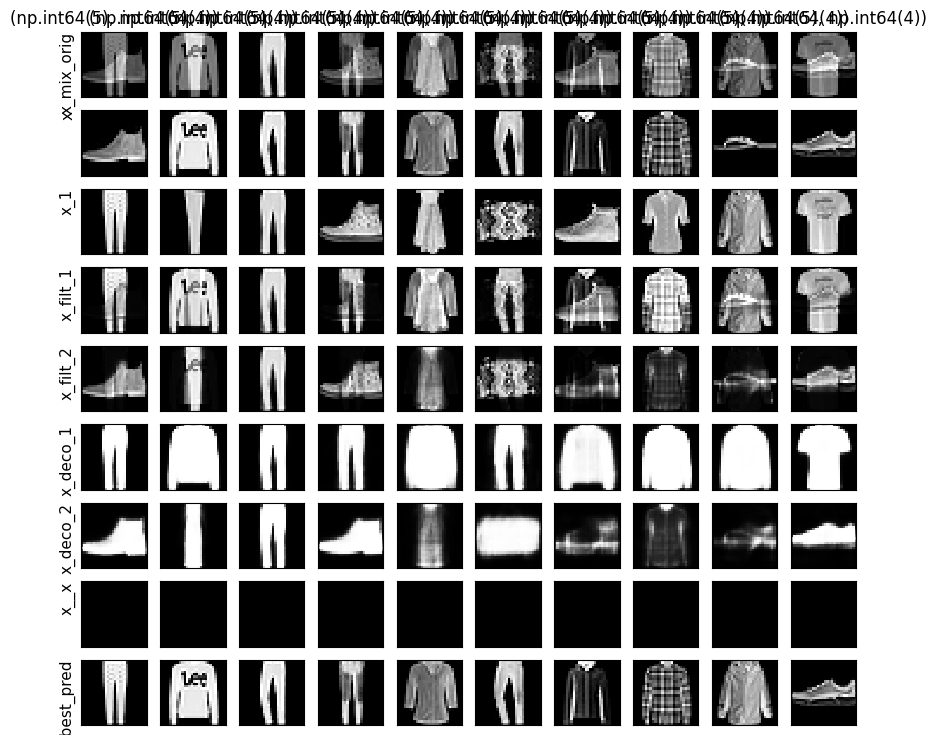

bpsnr:  (<tf.Tensor: shape=(), dtype=float32, numpy=18.30356788635254>, <tf.Tensor: shape=(), dtype=float32, numpy=3.7817232608795166>)


In [2]:

import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =0
end =start+10

metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_graph=True
)

bpsnr = metrics["bpsnr"]
print(f"bpsnr:  {bpsnr}")

### Antes de los cambios: ias=0.2562,slope=10.0067
bpsnr:  14.926691055297852 2.454422950744629

### Despues de los cambios ias=0.2562,slope=10.0067
bpsnr: 17.96120834350586 3.5040183067321777

### Otimizacion  'bias': 0.18495822150909808, 'slope': 18.248678323921897


Optimizando los paramtros a raiz de estos cambios

2025-08-24 18:36:52.316875: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 18:36:52.320086: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 18:36:52.329240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756071412.344838 2569430 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756071412.349774 2569430 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756071412.361816 2569430 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando fashion como dataset


2025-08-24 18:36:54.894756: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-08-24 18:36:54.894774: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-24 18:36:54.894779: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: pc-santi
2025-08-24 18:36:54.894783: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: pc-santi
2025-08-24 18:36:54.894839: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.64.3
2025-08-24 18:36:54.894857: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 575.64.3
2025-

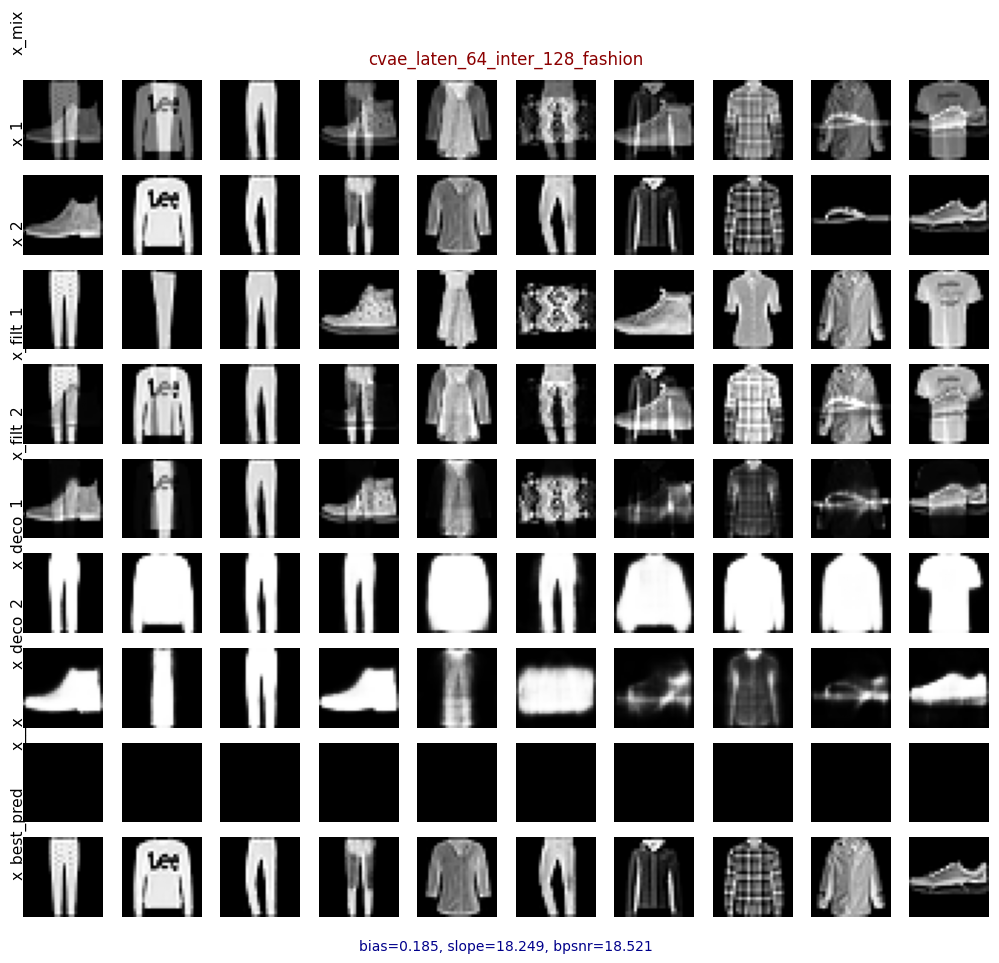

bpsnr:  (<tf.Tensor: shape=(), dtype=float32, numpy=18.521224975585938>, <tf.Tensor: shape=(), dtype=float32, numpy=3.4756855964660645>)


In [1]:

import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


crop_f0 = crop(model,predictor=predictor,
               data=data,bias=0.18495822150909808,slope= 18.248678323921897,beta=1)

start =0
end =start+10

metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_graph=True
)

bpsnr = metrics["bpsnr"]
print(f"bpsnr:  {bpsnr}")